## Fine-tune Stable DiffusionXL with DreamBooth and LoRA.

#### Step 1: Install libraries and dependencies.

In [1]:
# !pip install bitsandbytes transformers accelerate peft -q

Get the diffusers repository from HuggingFace.

In [2]:
# !pip install git+https://github.com/huggingface/diffusers.git -q

Download diffusers SDXL DreamBooth training script.

In [3]:
# #!wget https://raw.githubusercontent.com/huggingface/diffusers/main/examples/dreambooth/train_dreambooth_lora_sdxl.py

# !curl -O https://raw.githubusercontent.com/huggingface/diffusers/main/examples/dreambooth/train_dreambooth_lora_sdxl.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

100 84307  100 84307    0     0   234k      0 --:--:-- --:--:-- --:--:--  234k


#### Step 2: Training data

Create a folder named `SDXL_train` and upload all your training images in it. Make sure all the images are either `.png` or `.jpg`

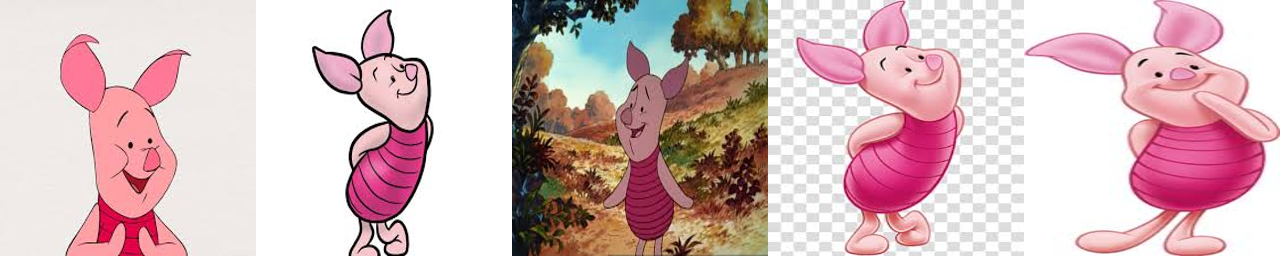

In [1]:
import os
from PIL import Image

def image_grid(imgs, rows, cols, resize=256):
    if resize is not None:
        imgs = [img.resize((resize, resize)) for img in imgs]
    w, h = imgs[0].size
    grid = Image.new("RGB", size=(cols * w, rows * h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i % cols * w, i // cols * h))
    return grid

# Path to the existing directory containing images on your laptop
local_dir = "/Users/maelys/Desktop/BSE/Thesis/Comics-GenAI/data/"

# Read images from the existing directory
img_paths = sorted([os.path.join(local_dir, filename) for filename in os.listdir(local_dir) if filename.endswith(".jpg")])
imgs = [Image.open(path) for path in img_paths]

# Number of images to preview
num_imgs_to_preview = min(5, len(imgs))

# Display the images in a grid
image_grid(imgs[:num_imgs_to_preview], 1, num_imgs_to_preview) #.show()

#### Add a token identifier

Let's incorporate a token identifier (e.g., TOK) into each caption by introducing a caption prefix.

Feel free to customize the prefix based on the specific concept you are training on.

For example: If you're fine-tuning on -
*   Human face - "Photo of a TOK person"
*   Car - "A photo of a TOK car"
*   Styles - "In the style of watercolour"



In [5]:
# %pip install -U autotrain-advanced


  Using cached autotrain_advanced-0.7.46-py3-none-any.whl (251 kB)
  Using cached accelerate-0.29.1-py3-none-any.whl (297 kB)
  Using cached nvitop-1.3.2-py3-none-any.whl (215 kB)
  Using cached transformers-4.39.3-py3-none-any.whl (8.8 MB)
  Using cached diffusers-0.27.2-py3-none-any.whl (2.0 MB)
  Using cached huggingface_hub-0.22.2-py3-none-any.whl (388 kB)
  Using cached autotrain_advanced-0.7.45-py3-none-any.whl (248 kB)
  Using cached autotrain_advanced-0.7.44-py3-none-any.whl (248 kB)
  Using cached accelerate-0.29.0-py3-none-any.whl (297 kB)
  Using cached autotrain_advanced-0.7.43-py3-none-any.whl (248 kB)
  Using cached autotrain_advanced-0.7.42-py3-none-any.whl (250 kB)
  Using cached autotrain_advanced-0.7.41-py3-none-any.whl (250 kB)
  Using cached autotrain_advanced-0.7.40-py3-none-any.whl (250 kB)
  Using cached autotrain_advanced-0.7.39-py3-none-any.whl (250 kB)
  Using cached autotrain_advanced-0.7.38-py3-none-any.whl (250 kB)
  Using cached autotrain_advanced-0.7.37-p

In [6]:
# !pip install torch torchvision


In [2]:
import os

# Define the path to your image directory
image_dir = "/Users/maelys/Desktop/BSE/Thesis/Comics-GenAI/data/"

# Get a list of all files in the directory
files = os.listdir(image_dir)

# Iterate over each file and delete if it's a .DS_Store file
for file in files:
    if file.lower() == ".ds_store":
        os.remove(os.path.join(image_dir, file))
        print(f"Deleted .DS_Store file: {file}")

In [6]:
import pkg_resources

# Get a list of installed packages and their versions
installed_packages = pkg_resources.working_set

# Print the name and version of each installed package
for package in installed_packages:
    print(package.key, package.version)


hstspreload 2024.3.1
tzdata 2024.1
regex 2023.12.25
fsspec 2023.10.0
tifffile 2022.10.10
certifi 2022.6.15
pytz 2022.2.1
setuptools 59.8.0
cryptography 42.0.5
aiofiles 23.2.1
pyzmq 23.2.1
packaging 23.1
pip 22.2.2
attrs 22.1.0
argon2-cffi 21.3.0
argon2-cffi-bindings 21.2.0
libclang 14.0.6
pyarrow 14.0.1
unicodedata2 14.0.0
rich 13.7.1
pynvml 11.5.0
websockets 11.0.3
pillow 10.0.0
py-cpuinfo 9.0.0
ipython 8.4.0
thinc 8.2.3
click 8.1.7
ipywidgets 8.0.1
jupyter-client 7.3.4
pyngrok 7.0.3
ipykernel 6.15.1
colorlog 6.8.2
notebook 6.4.12
nbconvert 6.4.5
jupyter-console 6.4.4
smart-open 6.4.0
tornado 6.2
multidict 6.0.5
pyyaml 6.0
psutil 5.9.1
importlib-resources 5.9.0
nbformat 5.4.0
traitlets 5.3.0
altair 5.3.0
cachetools 5.2.0
hyperframe 5.2.0
decorator 5.1.1
bleach 5.0.1
tqdm 4.65.0
transformers 4.38.2
fonttools 4.37.1
protobuf 4.23.4
jsonschema 4.14.0
importlib-metadata 4.11.4
beautifulsoup4 4.11.1
jupyter-core 4.11.1
typing-extensions 4.10.0
rsa 4.9
pexpect 4.8.0
opencv-python-headless 4

In [4]:
!autotrain dreambooth \
--model "stabilityai/stable-diffusion-xl-base-1.0" \
--project-name "Dreambooth-SDXL" \
--image-path "/Users/maelys/Desktop/BSE/Thesis/Comics-GenAI/data" \
--prompt "A photo of Piglet." \
--resolution 1024 \
--batch-size 1 \
--num-steps 500 \
--gradient-accumulation 4 \
--lr 1e-4 \
--mixed-precision 'fp16'

> INFO    Namespace(version=False, revision=None, tokenizer=None, image_path='/Users/maelys/Desktop/BSE/Thesis/Comics-GenAI/data', class_image_path=None, prompt='A photo of Piglet.', class_prompt=None, num_class_images=100, class_labels_conditioning=None, prior_preservation=None, prior_loss_weight=1.0, resolution=1024, center_crop=None, train_text_encoder=None, sample_batch_size=4, num_steps=500, checkpointing_steps=100000, resume_from_checkpoint=None, scale_lr=None, scheduler='constant', warmup_steps=0, num_cycles=1, lr_power=1.0, dataloader_num_workers=0, use_8bit_adam=None, adam_beta1=0.9, adam_beta2=0.999, adam_weight_decay=0.01, adam_epsilon=1e-08, max_grad_norm=1.0, allow_tf32=None, prior_generation_precision=None, local_rank=-1, xformers=None, pre_compute_text_embeddings=None, tokenizer_max_length=None, text_encoder_use_attention_mask=None, rank=4, xl=None, mixed_precision='fp16', validation_prompt=None, num_validation_images=4, validation_epochs=50, checkpoints_total_limit=None

In [ ]:
# #!/usr/bin/env bash
# !accelerate launch train_dreambooth_lora_sdxl.py \
#   --pretrained_model_name_or_path="stabilityai/stable-diffusion-xl-base-1.0" \
#   --pretrained_vae_model_name_or_path="madebyollin/sdxl-vae-fp16-fix" \
#   --dataset_name="SDXL_train" \
#   --output_dir="SDXL_LoRA_model" \
#   --caption_column="prompt"\
#   --mixed_precision="fp16" \
#   --instance_prompt="a photo of TOK home" \
#   --resolution=1024 \
#   --train_batch_size=1 \
#   --gradient_accumulation_steps=3 \
#   --gradient_checkpointing \
#   --learning_rate=1e-4 \
#   --snr_gamma=5.0 \
#   --lr_scheduler="constant" \
#   --lr_warmup_steps=0 \
#   --mixed_precision="fp16" \
#   --use_8bit_adam \
#   --max_train_steps=500 \
#   --checkpointing_steps=717 \

#### Step 4: Inference model
Load the fine-tuned LoRA weights.

In [ ]:
import torch
from diffusers import DiffusionPipeline, AutoencoderKL

vae = AutoencoderKL.from_pretrained("madebyollin/sdxl-vae-fp16-fix", torch_dtype=torch.float16)
pipe = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    vae=vae,
    torch_dtype=torch.float16,
    variant="fp16",
    use_safetensors=True
)
pipe.load_lora_weights('/content/SDXL_LoRA_model/pytorch_lora_weights.safetensors')
_ = pipe.to("cuda")

Text to Image Generation

In [ ]:
prompt = "A photo of TOK home, an Indian living room basking in Republic Day morning sun, adorned with saffron, white, and green decor, and vibrant festive accents."

image = pipe(prompt=prompt, num_inference_steps=25).images[0]

# Save the SDXL image output.
image.save('/content/sdxl_output.png')

#### Image to Image Generation

Load the fine-tuned LoRA weights.

In [ ]:
from diffusers import AutoPipelineForImage2Image
from diffusers.utils import make_image_grid, load_image

pipeline = AutoPipelineForImage2Image.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, variant="fp16", use_safetensors=True
)
pipeline.load_lora_weights('/content/SDXL_LoRA_model/pytorch_lora_weights.safetensors')
_ = pipeline.to("cuda")

pipeline.enable_model_cpu_offload()

**Note:** Image-to-image generation might possibly require a runtime restart.

In [ ]:
# Pass the text-to-image generated output as an input to image-to-image.
image2image = load_image('/content/sdxl_output.png')
resized_image = image2image.resize((1024, 576))

prompt = "A photo of TOK home, an Indian living room basking in Republic Day morning sun, adorned with saffron, white, and green decor, and vibrant festive accents."

# pass prompt and image to pipeline
image_output = pipeline(prompt, image=resized_image, strength=0.5).images[0]
make_image_grid([image, image_output], rows=1, cols=2)